<h2> Understanding Gradient Descent </h2>




In [1]:
import torch
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
plt.rcParams["figure.figsize"] = (15, 8)

In [3]:
# random manual seed for consistency
# read more at https://pytorch.org/docs/stable/notes/randomness.html

torch.manual_seed(0)

num_data = 3

# Input 
x = 10 * torch.rand(num_data)
print(x)

# Output
y = x + torch.randn_like(x)
print(y)



tensor([4.9626, 7.6822, 0.8848])
tensor([5.3269, 7.8166, 1.0490])


The goal is to predict $y$ given some value of $x$. To do this we will fit a line that goes through the data points $(x_i, y_i)$. We will simplify the problem so that the line passes through the origin. The equation for such a line is 

$$
y = mx
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. Therefore, 

$$
y_i = m x_i
$$

Unless we have perfect data with no noise, even the best $m$ we can find will not perfectly fit the data. So, we will have an **error** or a **residual** given by

$$
e_i = (y_i - m x_i) 
$$

We want to find a value of $m$ that minimizes the error above. Positive or negative values of error are equally bad for us. So, we are interested in mimimizing the square of the error above. In addition, we want to mimimize the squared error over all the data points.  

In other words, we want to mimize a function of the residual that takes the following form

$$
l = \sum^n_{i=1}(y_i - m x_i)^2 \\
$$

This function is called the **loss function**. The sum of squared errors is just one type of loss function. There are other types of loss functions which will learn about later in the course. 

<h2>Brute Force Search</h2>

A naive way to find the value of $m$ is to do a brute force search over a large range of $m$. Let's just do it for fun. 

Minimum Loss :  tensor(0.5566)
Best parameter :  tensor(1.1111)


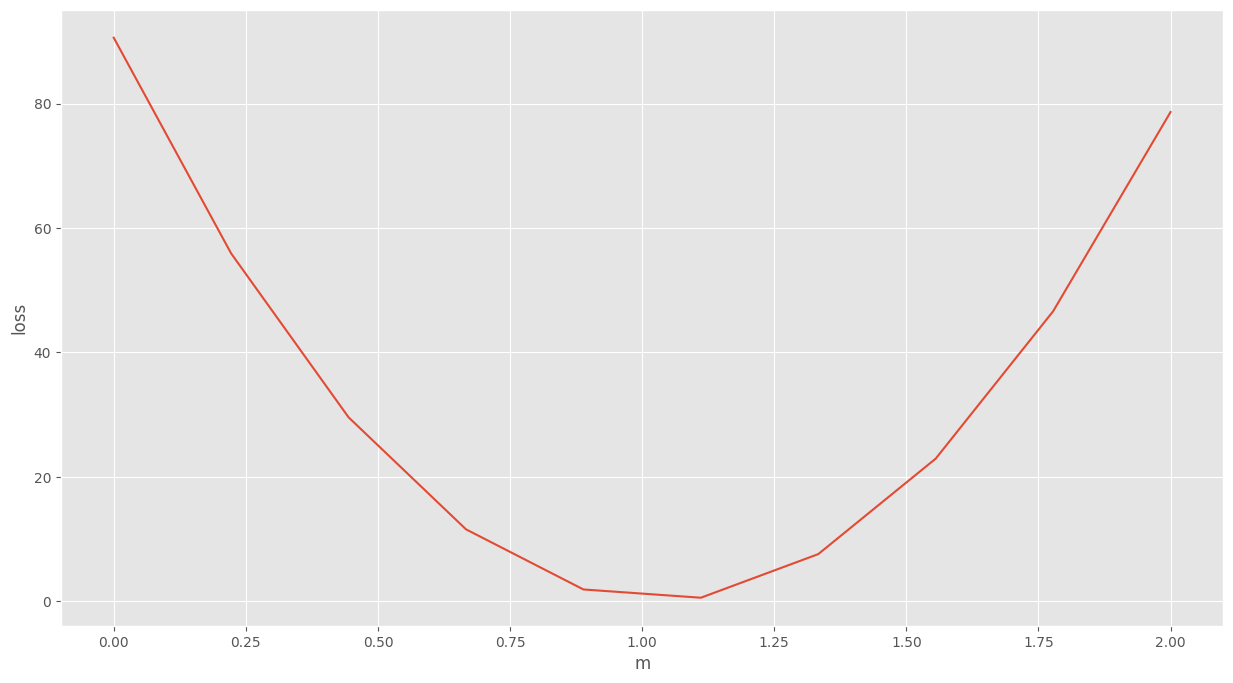

In [4]:
# Linear model 
# y = mx 

# Minimum value of m
min_val = 0.0 

# Maximum value of m
max_val = 2.0 

# Number of steps between min and max values
num_steps = 10

# Step size
step_size = (max_val - min_val)/(num_steps - 1)

# Space for storing all values of m
m = torch.zeros(num_steps)

# Space for storing loss corresponding 
# to different values of m. 
loss = torch.zeros(num_steps)

# Calculate loss for all possible m
for i in range(0, num_steps):
    m[i] = min_val +  i * step_size
    e = y - m[i] * x
    loss[i] = torch.sum(torch.mul(e,e)) 


# Find the index for lowest loss
i = torch.argmin(loss)

# Minimum loss
print('Minimum Loss : ', loss[i])

# Find the value of m corresponding to lowest loss
print('Best parameter : ', m[i])

# Plot loss vs m  
plt.figure
plt.plot(m.numpy(), loss.numpy())
plt.xlabel('m')
plt.ylabel('loss')
plt.show()

<h2>Gradient Descent</h2>

The above plot shows that we can start from an initial guess of $m$, follow the slope of the curve, and keep iterating to reach the bottom of the curve. This simple idea is called gradient descent. 

Now the question is how do we calculate the gradient of the loss function with respect to $m$ at any point. 

This simply requires high school calculus. 

$$
\begin{align}
l &= \sum^n_{i=1}(y_i - m x_i)^2 \\
\frac{\partial l}{\partial m}  &= -2 \sum^n_{i=1} x_i(y_i - m x_i) \\
\end{align}
$$

To follow the slope of the curve, we need to move m in the direction of negative gradient. However, we need to control the rate at which we go down the slope so that we do not overshoot the minimum. So we use a parameter $\lambda$ called the learning rate. 

$$
m_k = m_{k-1} - \lambda \frac{\partial l}{\partial m}
$$

That is it! 

Let's implement this in code to see that it really works. 



Minimum loss :  tensor(0.1172)
Best parameter :  tensor(1.0585)


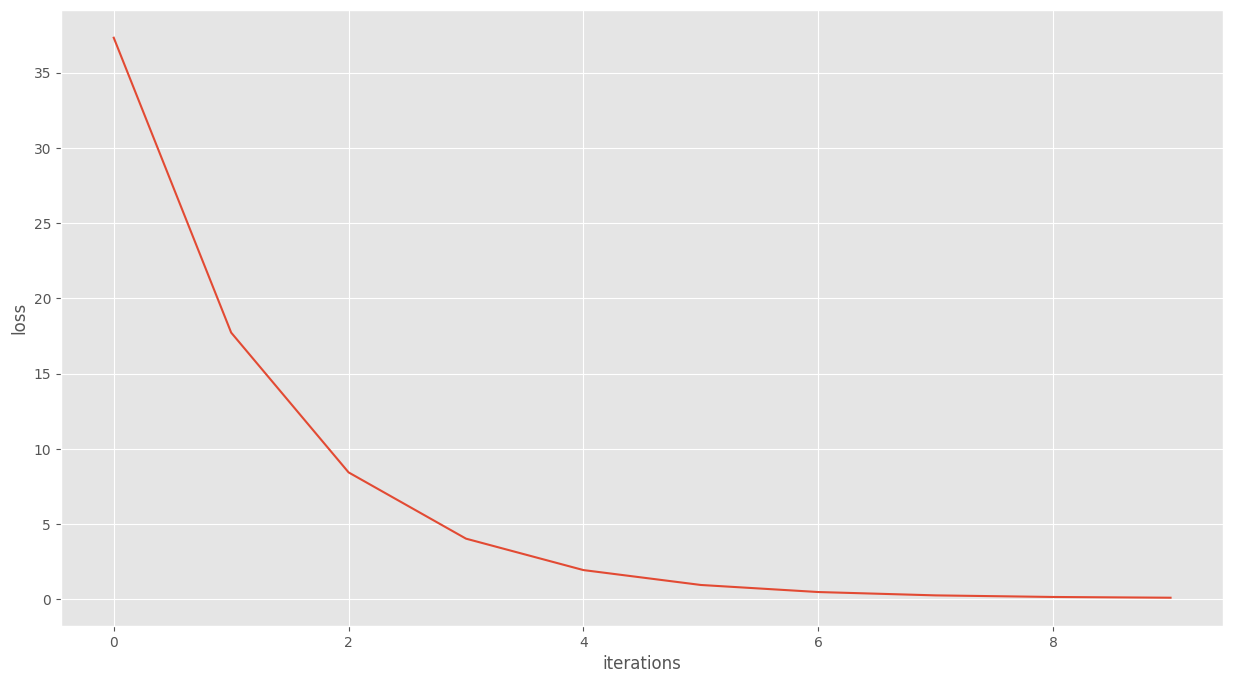

In [5]:
num_iter = 10

lr = 0.01
m = 2 

loss = torch.zeros(num_iter)
# Calculate loss for all possible m
for i in range(0, num_iter):
    g = -2 * torch.sum(x * (y - m * x))
    m = m -  lr * g
    e = y - m * x
    loss[i] = torch.sum(torch.mul(e,e)) 
    
print('Minimum loss : ', loss[-1])
print('Best parameter : ', m)

# Plot loss vs m  
plt.figure
plt.plot(loss.numpy())
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

<h2>Stochastic Gradient Descent</h2>

In this example, we have only three data points. In the real world, we can have millions of examples. Calculating gradient based on all data points can be computationally expensive. Fortunately, it is not necessary to use all data points for computing the gradient. 

We can use a **single** randomly chosen data point to compute the gradient at each step. Even though the gradient at each step is not as accurate, the idea still works as you can see in this example.


Minimum loss :  tensor(0.1251)
Best parameter :  tensor(1.0103)


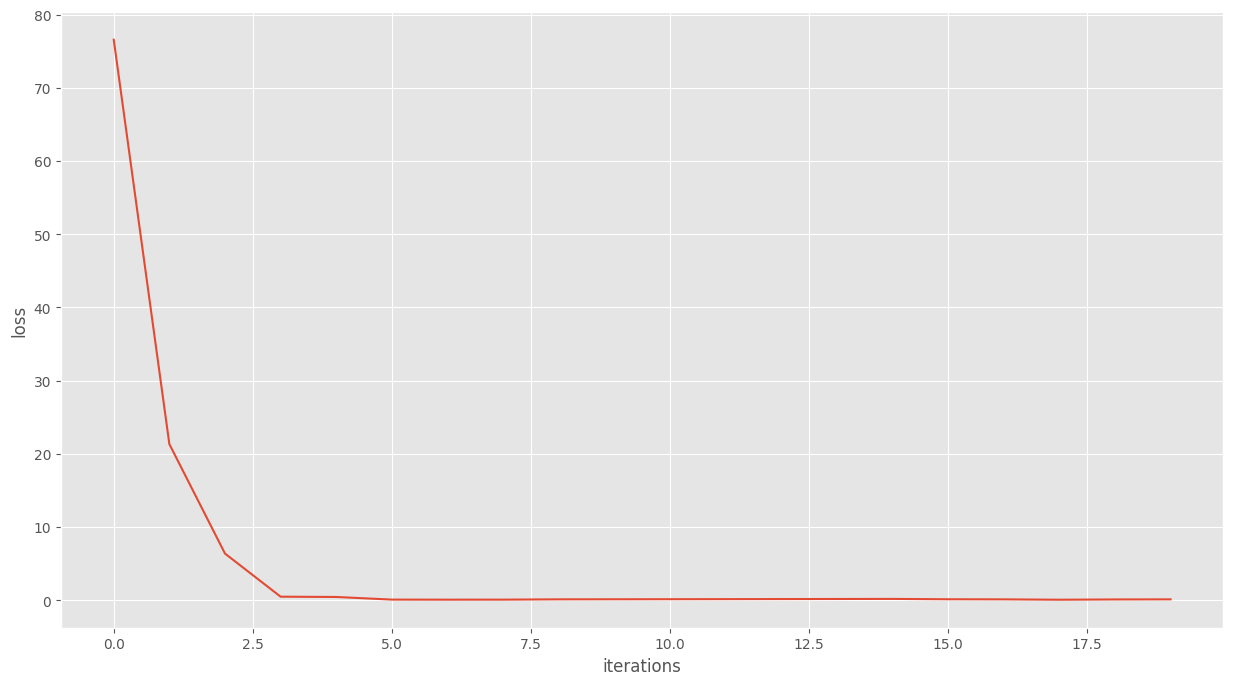

In [6]:
num_iter = 20

lr = 0.01
m = 2 
print()
loss = torch.zeros(num_iter)

for i in range(0, num_iter):

    # Randomly select a training data point
    k = torch.randint(0, len(y), (1,))[0]

    # Calculate gradient using a single data point
    g = -2 * x[k] * (y[k] - m * x[k])
    m = m -  lr * g
    e = y - m * x
    loss[i] = torch.sum(torch.mul(e,e)) 

print('Minimum loss : ', loss[-1])
print('Best parameter : ', m)

# Plot loss vs m  
plt.figure
plt.plot(loss.numpy())
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

<h2>Stochastic Gradient Descent with Minibatch</h2>

In the previous section, we saw that it is possible to calculate gradient based on a single data point, and as long as we were running many iterations, Stochastic Gradient Descent will still work. 

However, using more than one data point for gradient calculation has two advantages
1. Gradients are less noisy. 
2. GPUs can process multiple data points ( or images ) in one shot. 

So, we get better results and faster convergence if we use a small batch of data points, called a **mini-batch**, to compute the gradients. 

Let's implement this in code, and see for ourselves. 


Minimum loss :  968.7548217773438
Best parameter :  1.0259220600128174


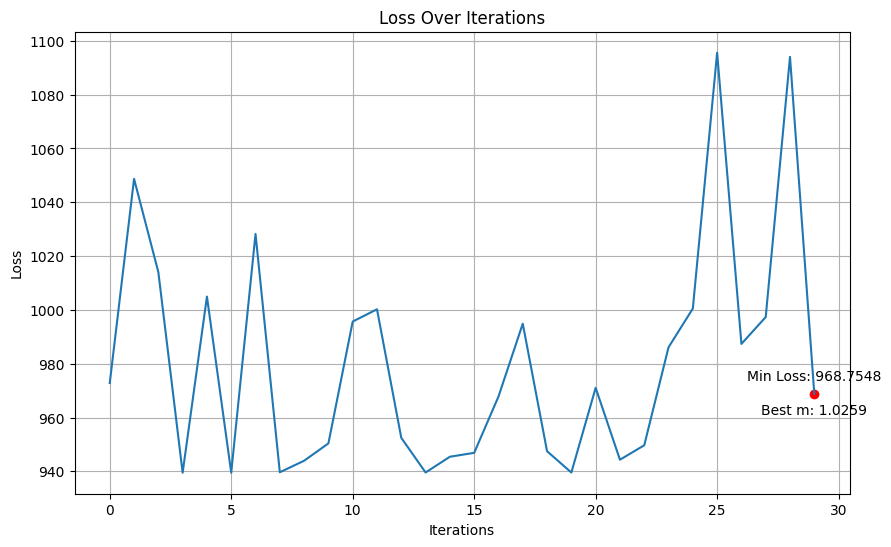

In [5]:
num_data = 1000
batch_size = 10

# Input 
x = 10 * torch.rand(num_data)

# Output
y = x + torch.randn_like(x)

num_iter = 30

lr = 0.001
m = 2 
print()
loss = torch.zeros(num_iter)

for i in range(0, num_iter):

    # Randomly select a training data point
    k = torch.randint(0, len(y)-1, (batch_size,))
  
    # Calculate gradient using a mini-batch
    g = -2 * torch.sum(x[k] * (y[k] - m * x[k]))
    m = m -  lr * g
    e = y - m * x
    loss[i] = torch.sum(torch.mul(e,e)) 


# Output the final loss and parameter value
final_loss = loss[-1].item()
best_param = m.item()

print('Minimum loss : ', final_loss)
print('Best parameter : ', best_param)

# Re-plot loss over iterations with annotations for the minimum loss and best parameter value
plt.figure(figsize=(10, 6))
plt.plot(loss.numpy())
plt.scatter(num_iter - 1, final_loss, color='red')  # Point for the minimum loss
plt.annotate(f'Min Loss: {final_loss:.4f}', (num_iter - 1, final_loss), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'Best m: {best_param:.4f}', (num_iter - 1, final_loss), textcoords="offset points", xytext=(0,-15), ha='center')
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title(f"Loss Over Iterations")
plt.grid(True)
plt.show()


# <font style="color:blue">Exercise</font>
Here are a few things that you may try with the above code and have fun!

1. Change the learning rate parameter and plot the curves. ( make it higher and lower )
2. When learning rate is set to lower values, do you need to train for longer iterations or less?